In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')

In [2]:
corona_df = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/시도별코로나확진자수/Corona_def.csv')
corona_df

,기준일,지역,확진자수,전일대비증감수,십만명당발생률,사망자수,격리해제수
0,2021-08-31,합계,251416,1371,485.09,2285,221701
1,2021-08-31,서울,79352,456,820.73,583,69401
2,2021-08-31,부산,11386,44,335.68,148,10272
3,2021-08-31,대구,13646,51,564.27,227,12629
4,2021-08-31,인천,11827,73,401.89,77,10492
...,...,...,...,...,...,...,...
11205,2020-01-20,전남,0,0,0.00,0,0
11206,2020-01-20,경북,0,0,0.00,0,0
11207,2020-01-20,경남,0,0,0.00,0,0
11208,2020-01-20,제주,0,0,0.00,0,0


In [3]:
# 전체에서 지역 구분 어떻게 되어 있는지 확인
corona_df['지역'].unique()

array(['합계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주', '검역'], dtype=object)

In [4]:
# 우리 배달 데이터랑 '광역시도' 단위로 맞출 수 있음
delivery_df = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/cleaned_data/freq_with_holiday.csv', index_col=0)
delivery_df

/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,N,N
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,N,N
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,N,N
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,N,N
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,N,N
...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,N,N
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,N,N
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,N,N
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,N,N


# 코로나랑 배달 정보를 같이 볼 건데, 어떻게 같이 볼 수 있을까?

- 지역을 광역시도로 한정하는게 좋겠다. 왜? 코로나로 인한 행정조치가 주로 광역시도 단위로 이루어짐. 
- 그러면 총 17개의 광역시도 단위에서, 코로나 확진자 추세와 배달데이터 변화량을 볼 수 있음.
- 여기에 코로나 이전 데이터와 비교는 하지 않는 것으로?


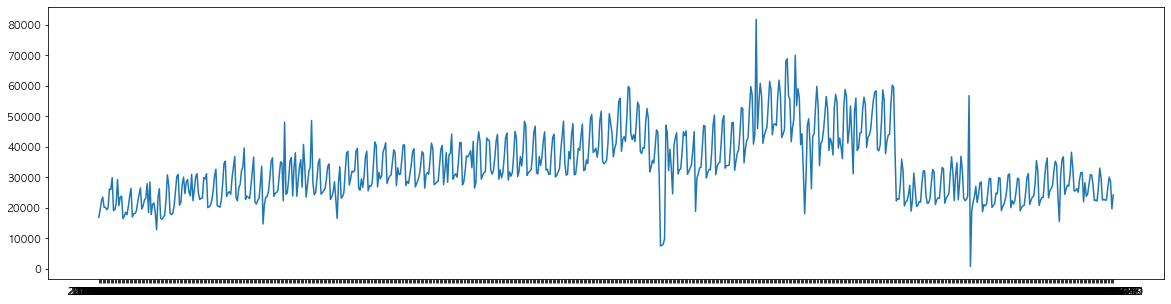

In [5]:
# 일단 전체 기간의 배달건수 변화를 쭉 뽑아보자
entire_change_by_date = delivery_df.groupby('날짜').sum('배달건수').reset_index()
entire_change_by_date
plt.figure(figsize=(20,5))

plt.plot(entire_change_by_date['날짜'],entire_change_by_date['배달건수'])
plt.show()

In [6]:
# 일단 전체 기간의 배달건수 일단위로 뽑으니 보기 더럽다...월별로 뽑아보자

# 일단 월 칼럼 하나 만들어주고
year = []
month = []
for data in delivery_df['날짜'] :
    year.append(data.split('-')[0])
    month.append(data.split('-')[1])

delivery_df['month'] = month
delivery_df['year'] = year
delivery_df['year_month'] = delivery_df['year']+'-'+delivery_df['month']
delivery_df

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday,month,year,year_month
0,2019-08-01,0,강원도,속초시,교동,1,목,N,N,08,2019,2019-08
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,N,N,08,2019,2019-08
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,N,N,08,2019,2019-08
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,N,N,08,2019,2019-08
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,N,N,08,2019,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,N,N,08,2021,2021-08
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,N,N,08,2021,2021-08
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,N,N,08,2021,2021-08
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,N,N,08,2021,2021-08


In [7]:
delivery_df

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday,month,year,year_month
0,2019-08-01,0,강원도,속초시,교동,1,목,N,N,08,2019,2019-08
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,N,N,08,2019,2019-08
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,N,N,08,2019,2019-08
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,N,N,08,2019,2019-08
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,N,N,08,2019,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,N,N,08,2021,2021-08
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,N,N,08,2021,2021-08
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,N,N,08,2021,2021-08
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,N,N,08,2021,2021-08


In [25]:
# groupby를 year_month로 하고, 배달건수 총 합계를 차팅하기
entire_trend_by_month = delivery_df.groupby(['광역시도','year_month']).sum('배달건수').reset_index()
entire_trend_by_month 

,광역시도,year_month,시간대,배달건수
0,강원도,2019-08,43584,7794
1,강원도,2019-09,40165,6101
2,강원도,2019-10,39445,6030
3,강원도,2019-11,33754,4848
4,강원도,2019-12,20933,2083
...,...,...,...,...
404,충청북도,2021-04,74337,19329
405,충청북도,2021-05,74767,19408
406,충청북도,2021-06,75463,20056
407,충청북도,2021-07,72692,20586


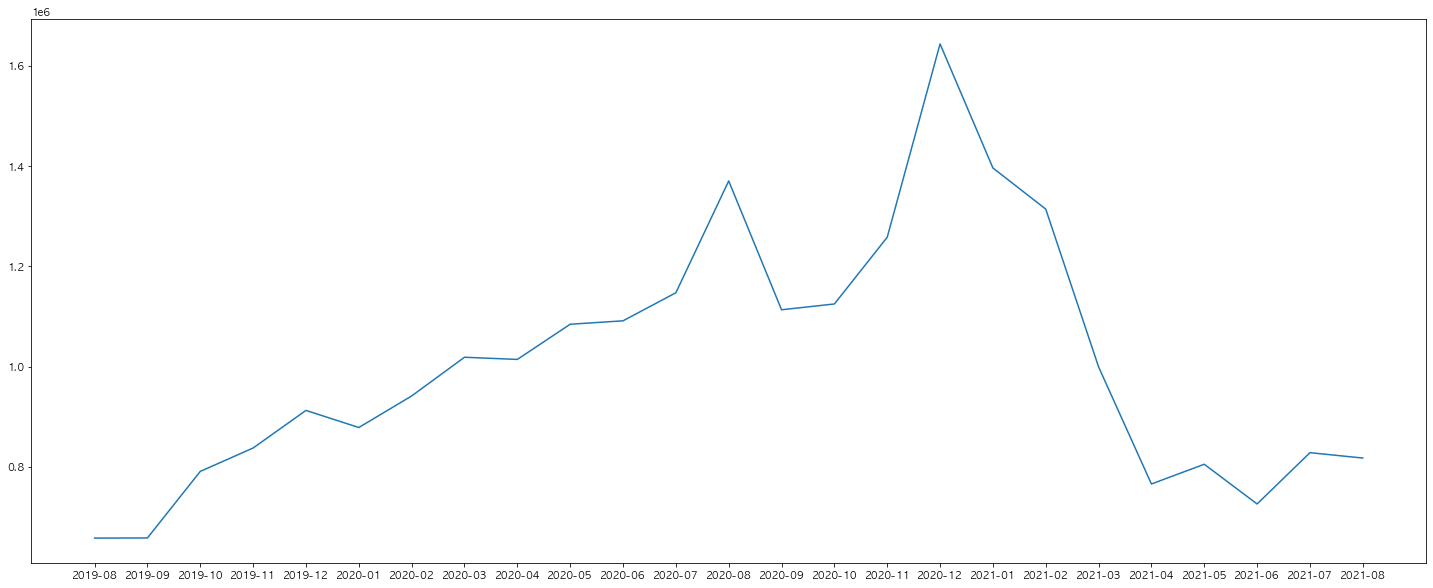

In [11]:
plt.figure(figsize=(25,10))
plt.plot(entire_trend_by_month['year_month'], entire_trend_by_month['배달건수'])
plt.show()

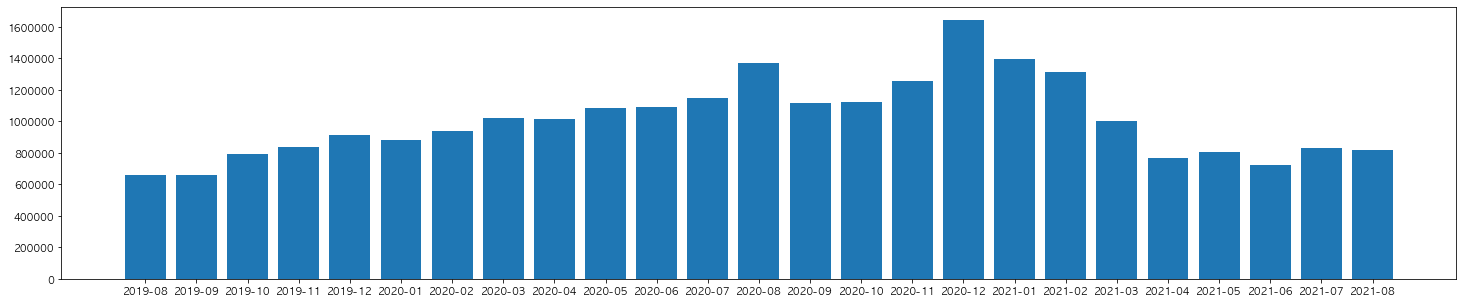

In [12]:
fig, ax = plt.subplots(figsize=(25,5))
ax.bar(entire_trend_by_month['year_month'], entire_trend_by_month['배달건수'])

plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [13]:
corona_df[corona_df['지역']=='서울'].head(20)

,기준일,지역,확진자수,전일대비증감수,십만명당발생률,사망자수,격리해제수
1,2021-08-31,서울,79352,456,820.73,583,69401
20,2021-08-30,서울,78896,442,816.01,582,69037
39,2021-08-29,서울,78454,517,811.44,581,68486
58,2021-08-28,서울,77937,569,806.09,581,67887
77,2021-08-27,서울,77368,556,800.21,579,67259
96,2021-08-26,서울,76812,570,794.46,578,66624
115,2021-08-25,서울,76242,677,788.56,575,66391
134,2021-08-24,서울,75565,436,781.56,574,65742
153,2021-08-23,서울,75129,388,777.05,573,65285
172,2021-08-22,서울,74741,497,773.04,571,64796


- 당일 확진자수 = 전날 확진자수 + 신규 확진자수 - 격리해제수 - 사망자     -> 계산 맞나?
- 신규 확진자수 = 당일 확진자수 - 전날 확진자수 + 격리해제수 + 사망자
- 전일대비증감수 = 당일 확진자수 - 전날 확진자수
- 코로나도 데이터를 '현재 확진자수'로 할건지, '신규확진자수'로 할건지

### -> 아 걍 신규확진자 무시하고 증감수로 하자....

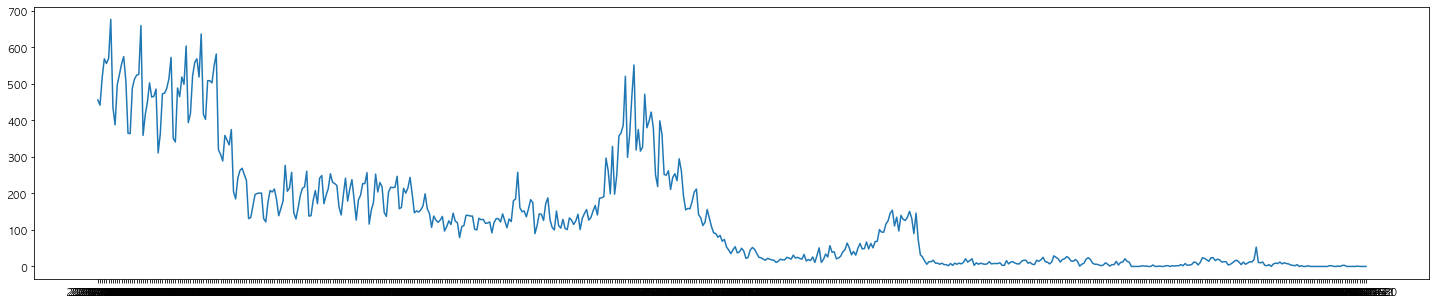

In [17]:
local_corona = corona_df[corona_df['지역']=='서울']
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(local_corona['기준일'], local_corona['전일대비증감수'])

plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [18]:
corona_df.head()

,기준일,지역,확진자수,전일대비증감수,십만명당발생률,사망자수,격리해제수
0,2021-08-31,합계,251416,1371,485.09,2285,221701
1,2021-08-31,서울,79352,456,820.73,583,69401
2,2021-08-31,부산,11386,44,335.68,148,10272
3,2021-08-31,대구,13646,51,564.27,227,12629
4,2021-08-31,인천,11827,73,401.89,77,10492


In [21]:
# 여기도 한달 단위로 끊자
year = []
month = []
for data in corona_df['기준일'] :
    year.append(data.split('-')[0])
    month.append(data.split('-')[1])

corona_df['month'] = month
corona_df['year'] = year
corona_df['year_month'] = corona_df['year']+'-'+corona_df['month']
corona_df
# groupby를 year_month로 하고, 배달건수 총 합계를 차팅하기
corona_trend_by_month =corona_df.groupby(['지역','year_month']).sum('전일대비증감수').reset_index()
corona_trend_by_month

,지역,year_month,확진자수,전일대비증감수,십만명당발생률,사망자수,격리해제수
0,강원,2020-01,0,0,0.00,0,0
1,강원,2020-02,43,7,0.00,0,0
2,강원,2020-03,868,29,55.89,25,228
3,강원,2020-04,1484,17,96.33,42,770
4,강원,2020-05,1692,4,109.87,68,1367
...,...,...,...,...,...,...,...
375,합계,2021-04,3376018,18927,6511.44,53527,3086063
376,합계,2021-05,4078735,18331,7866.79,58835,3767826
377,합계,2021-06,4467930,16623,8617.45,59733,4196870
378,합계,2021-07,5452457,41374,10519.20,63646,4918898


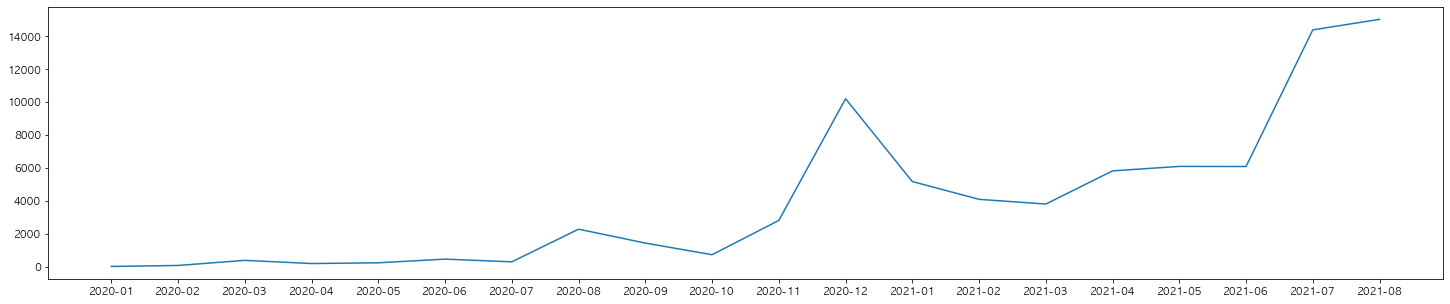

In [24]:
local_corona_by_month = corona_trend_by_month[corona_trend_by_month['지역']=='서울']
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(local_corona_by_month['year_month'], local_corona_by_month['전일대비증감수'])

plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [ ]:
# 서울지역 코로나확진자 증감수와 배달건수 겹쳐보기
# 기간은 2019년8월부터 2021년8월

plt.style.use('default')

fig, ax1 = plt.subplots()

# 첫번째는 배달 데이터. 가로축은 월단위, 세로축은 하루평균 배달건수

ax1.plot()


- 지역별, 월별 코로나 트렌드 : corona_trend_by_month
- 지역별, 월별 배달 트렌드 : delivery_df

In [30]:
# 지역별 코로나 트렌드 : corona_trend_by_month
# 선택 지역에서, 발생한 코로나 증감추세
local_corona_by_month = corona_trend_by_month[corona_trend_by_month['지역']=='서울']
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(local_corona_by_month['year_month'], local_corona_by_month['전일대비증감수'])

plt.ticklabel_format(axis="y", style="plain")
plt.show()

,지역,year_month,확진자수,전일대비증감수,십만명당발생률,사망자수,격리해제수
0,강원,2020-01,0,0,0.00,0,0
1,강원,2020-02,43,7,0.00,0,0
2,강원,2020-03,868,29,55.89,25,228
3,강원,2020-04,1484,17,96.33,42,770
4,강원,2020-05,1692,4,109.87,68,1367
...,...,...,...,...,...,...,...
375,합계,2021-04,3376018,18927,6511.44,53527,3086063
376,합계,2021-05,4078735,18331,7866.79,58835,3767826
377,합계,2021-06,4467930,16623,8617.45,59733,4196870
378,합계,2021-07,5452457,41374,10519.20,63646,4918898


In [29]:
delivery_df

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday,month,year,year_month
0,2019-08-01,0,강원도,속초시,교동,1,목,N,N,08,2019,2019-08
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,N,N,08,2019,2019-08
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,N,N,08,2019,2019-08
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,N,N,08,2019,2019-08
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,N,N,08,2019,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,N,N,08,2021,2021-08
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,N,N,08,2021,2021-08
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,N,N,08,2021,2021-08
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,N,N,08,2021,2021-08


In [32]:
corona_trend_by_month.to_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/cleaned_data/corona_trend_by_month.csv')

In [34]:
delivery_by_month = delivery_df.groupby(['광역시도','year_month']).sum().reset_index()
delivery_by_month

,광역시도,year_month,시간대,배달건수
0,강원도,2019-08,43584,7794
1,강원도,2019-09,40165,6101
2,강원도,2019-10,39445,6030
3,강원도,2019-11,33754,4848
4,강원도,2019-12,20933,2083
...,...,...,...,...
404,충청북도,2021-04,74337,19329
405,충청북도,2021-05,74767,19408
406,충청북도,2021-06,75463,20056
407,충청북도,2021-07,72692,20586


In [35]:
delivery_by_month.to_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/cleaned_data/delivery_by_month.csv')